<font size=18 weight='bold'>*~ plot orbits ~*</font>


In [9]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
import importlib
from astropy.cosmology import FlatLambdaCDM

from utils_orbs.orb_paths import SetupPaths
import utils_orbs.readsubfHDF5Py3 as readSub
# from utils.read_group_cats import ReadCats
from utils_orbs.merger_trees import TraceMergerTree
from utils_orbs.readMergerHistoryFiles import FindHistory
from utils_orbs.vectorCorrection import vectorCorrection as vector

paths = SetupPaths()

In [5]:
plt.show();
plt.rcParams.update({'font.size':20,"xtick.direction":"in","ytick.direction":"in", 
                     "xtick.top":True, "ytick.right":True,"text.usetex":False,
                     "xtick.labelsize":18,"ytick.labelsize":18})

# Read Data

In [6]:
f = h5py.File(f"{paths.path_data}orbitdata_40.hdf5",'r')
orbit = {}
for key, val in f.items():
    orbit[key] = np.array(val)
f.close()

f = h5py.File(f"{paths.path_data}snapshot_data.hdf5",'r')
snap_dict = {}
for key, val in f.items():
    snap_dict[key] = np.array(val)
f.close()

## Explore mergers

In [7]:
# getting locations of all mergers
mergers = ~np.isnan(orbit['MergerSnapshot'])

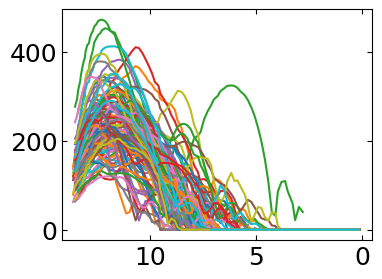

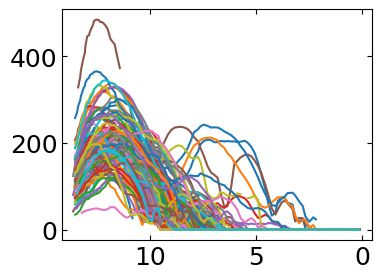

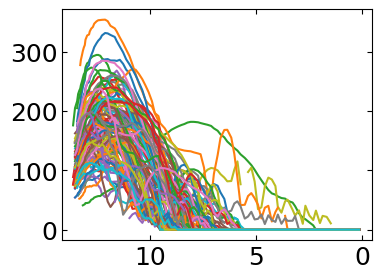

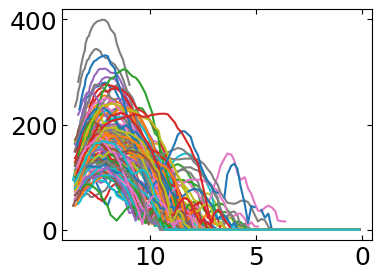

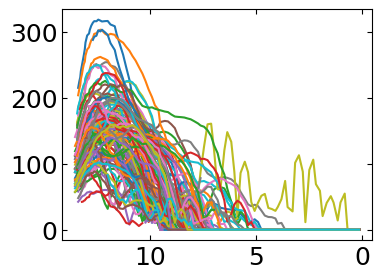

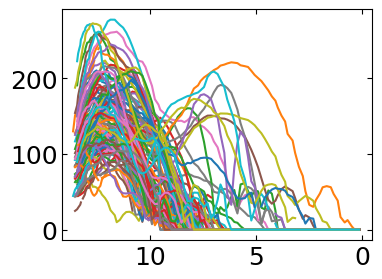

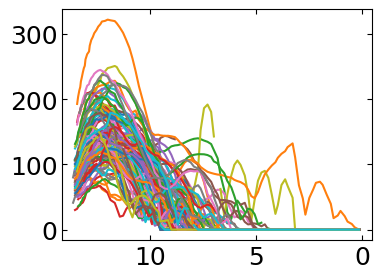

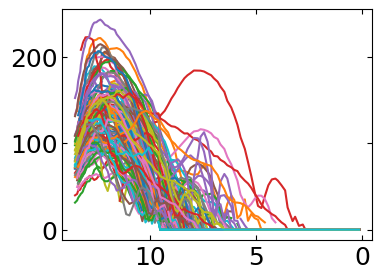

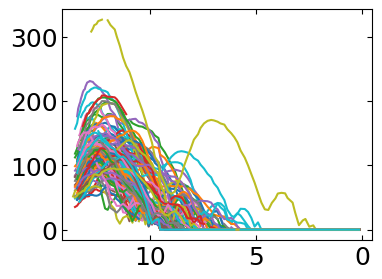

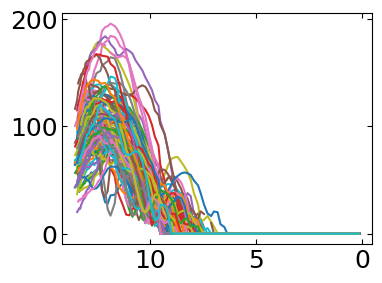

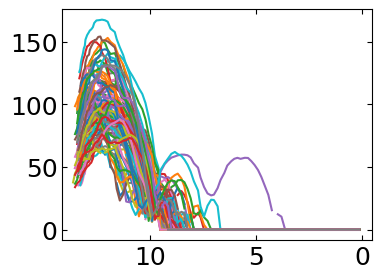

In [10]:
nummergers = len(orbit['Separations'][mergers])

plotnum = 0
for i in range(nummergers):
    if plotnum%110 == 0:
        fig = plt.figure(figsize=(4,3))
    plotnum += 1
    plt.plot(snap_dict['Lookback Time'][::-1][1:],orbit['Separations'][mergers][i])    
#     plt.legend()    
    plt.xlim(np.max(snap_dict['Lookback Time']+0.5),-0.5)
plt.show()


## Explore non-mergers

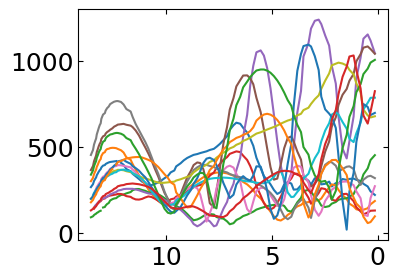

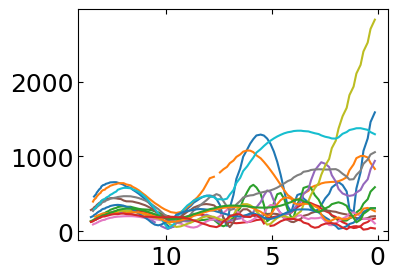

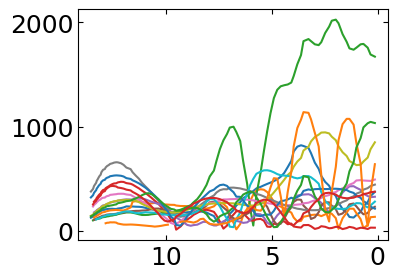

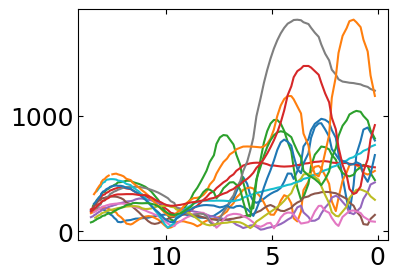

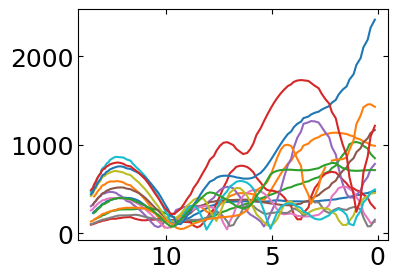

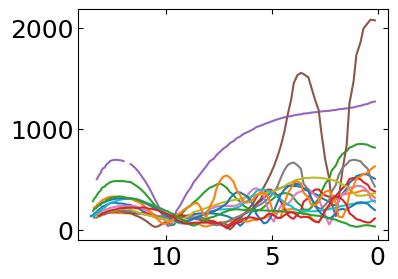

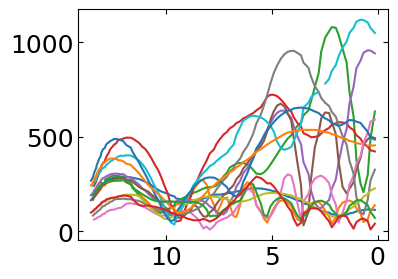

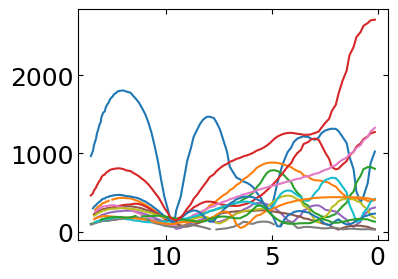

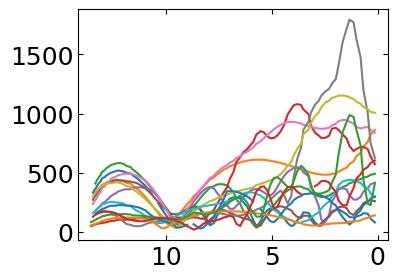

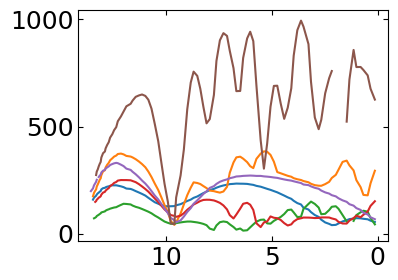

In [9]:
nonmergers = np.isnan(orbit['MergerSnapshot'])
numnonmergers = len(orbit['Separations'][nonmergers])

plotnum = 0
for i in range(numnonmergers):
    if plotnum%14 == 0:
        fig = plt.figure(figsize=(4,3))
    plotnum += 1
    plt.plot(snap_dict['Lookback Time'][::-1][1:],orbit['Separations'][nonmergers][i])    
#     plt.legend()    
    plt.xlim(np.max(snap_dict['Lookback Time']+0.5),-0.5)
plt.show()


# Plots of orbits as examples

In [4]:
f = h5py.File(f"{paths.path_data}orbitdata_40.hdf5",'r')
orbit = {}
for key, val in f.items():
    orbit[key] = np.array(val)
f.close()

f = h5py.File(f"{paths.path_data}snapshot_data.hdf5",'r')
snap = {}
for key, val in f.items():
    snap[key] = np.array(val)
f.close()

In [9]:
totalnum = len(orbit['MergerFlag'])
nummergers = np.count_nonzero(orbit['MergerFlag'])
numnonmergers = totalnum - nummergers
print("Total:",totalnum,"-- Mergers:",nummergers, "-- Non mergers:",numnonmergers)

Total: 1330 -- Mergers: 1198 -- Non mergers: 132


## Find example orbits (via visual inspection)

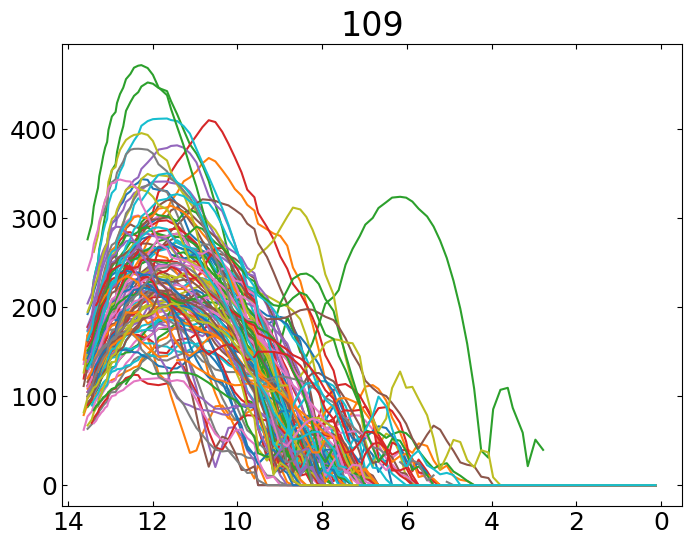

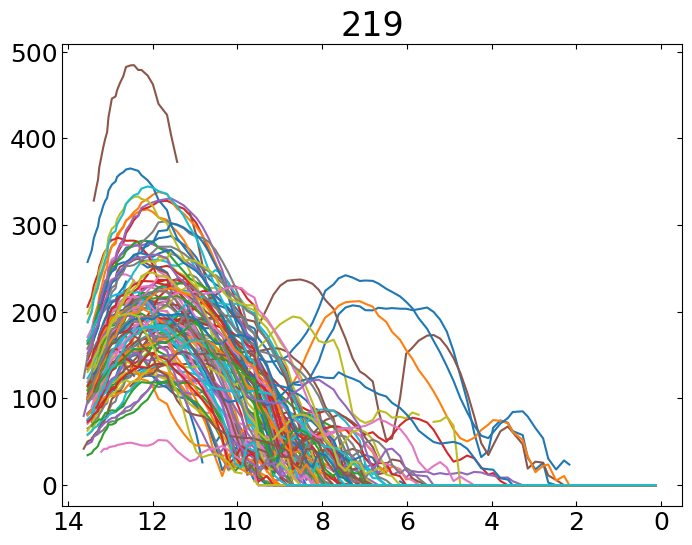

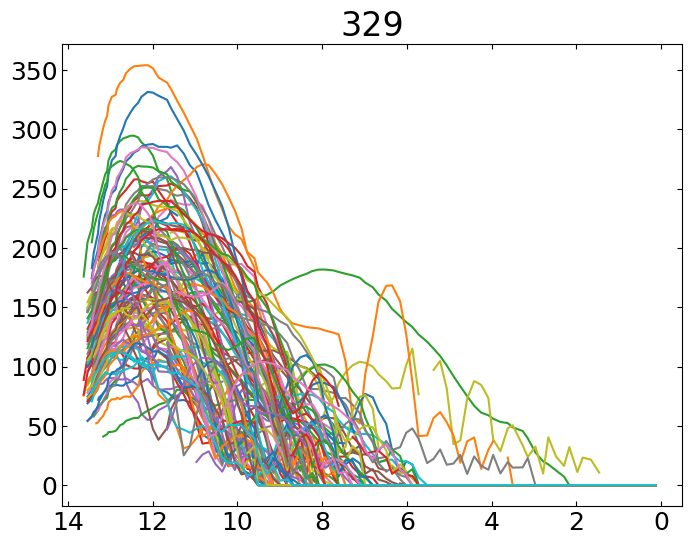

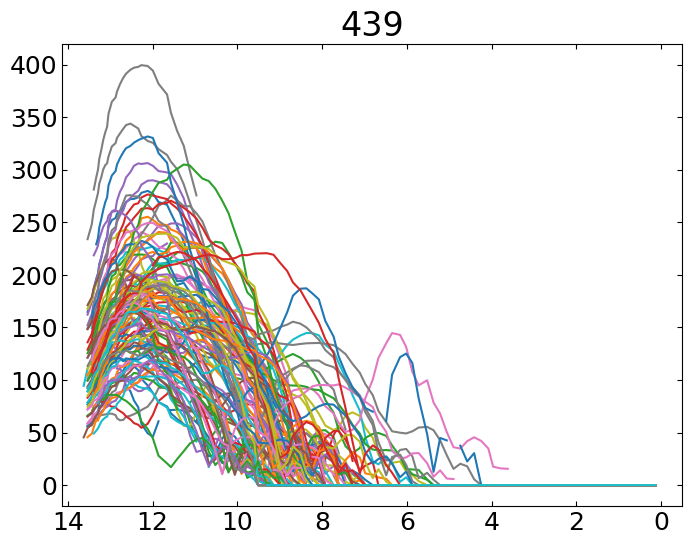

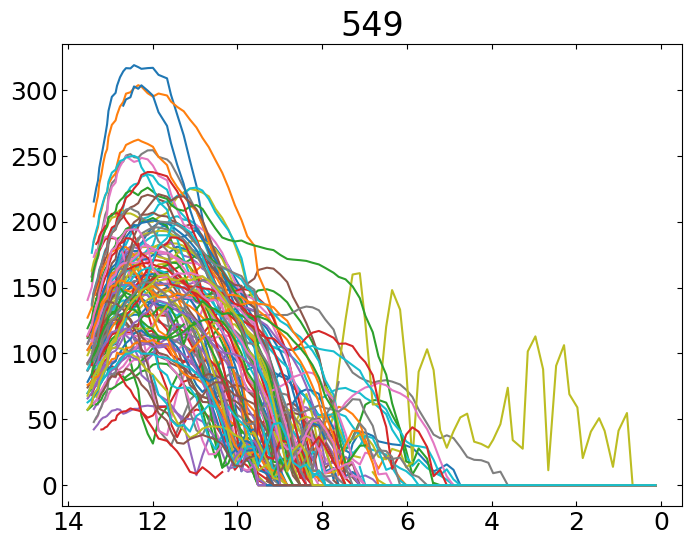

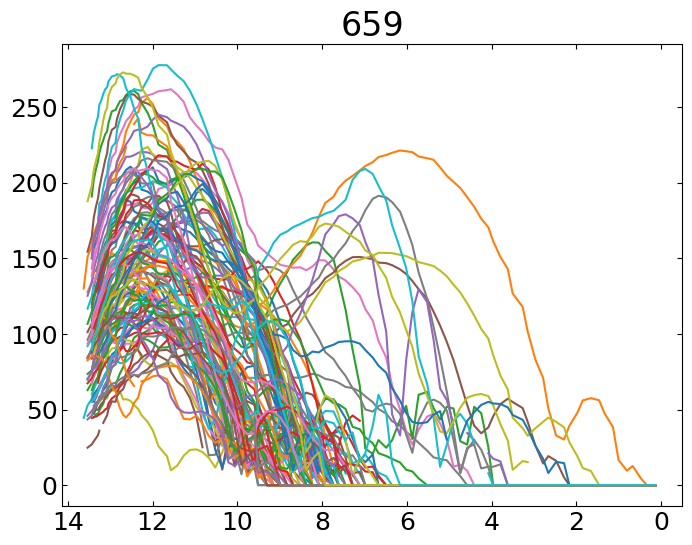

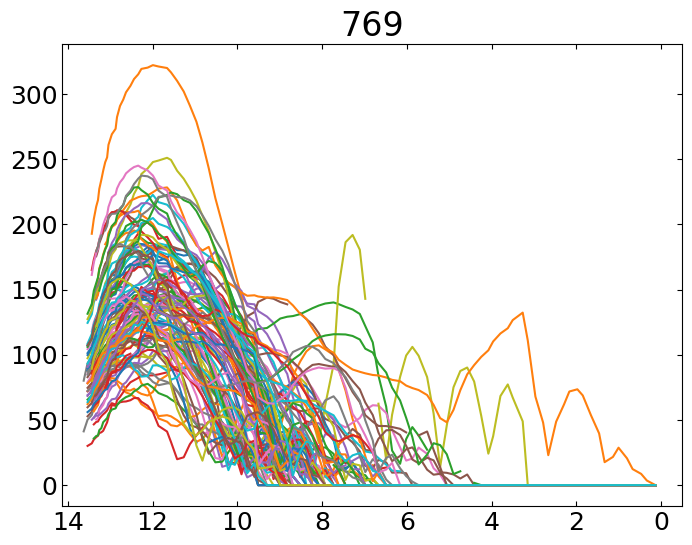

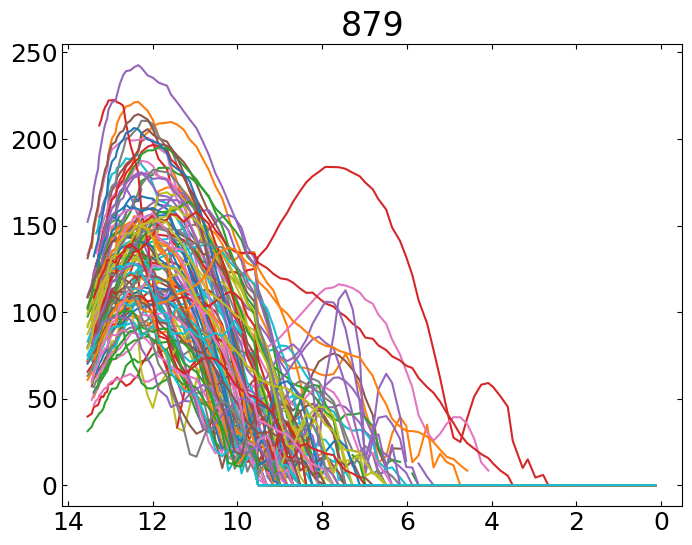

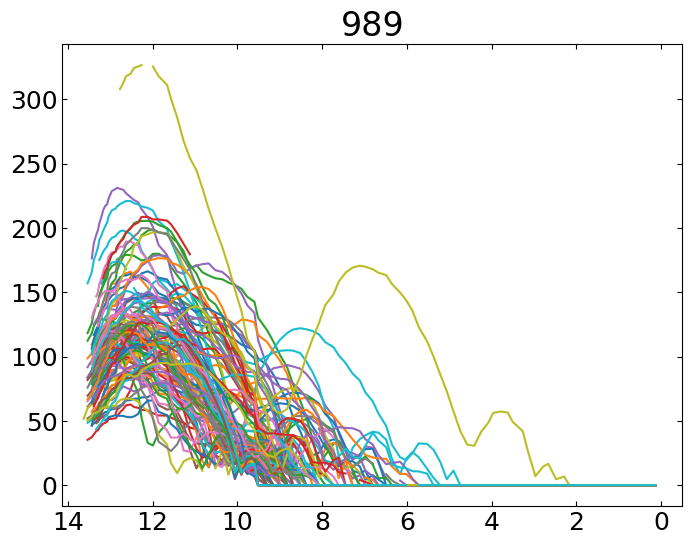

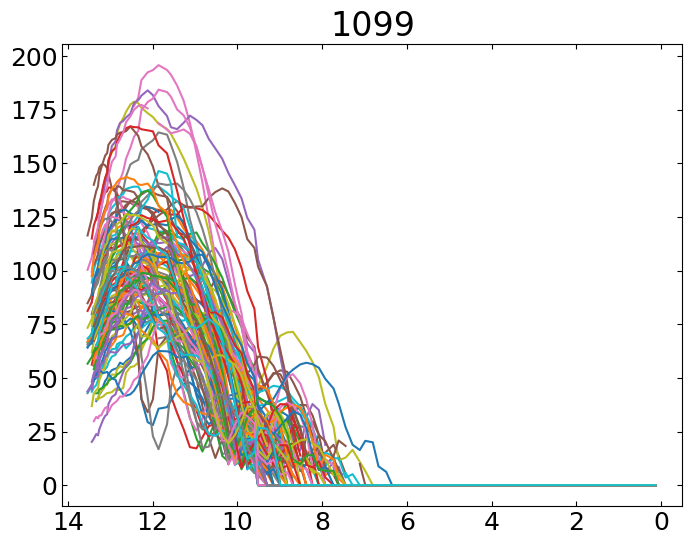

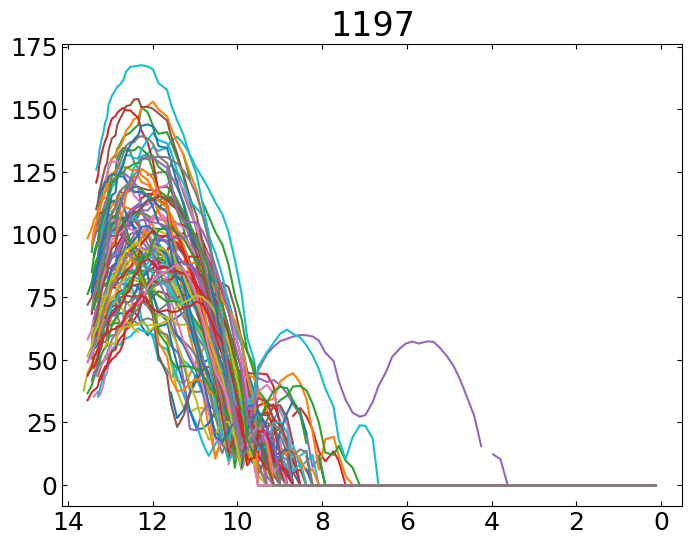

In [48]:
plotnum = 0
for i in range(nummergers):
    if plotnum%110 == 0:
        fig = plt.figure(figsize=(8,6))
    plt.plot(snap['Lookback Time'][::-1][1:],orbit['Separations'][orbit['MergerFlag']==1][i])    
    plt.title(plotnum)    
    plotnum += 1
    plt.xlim(np.max(snap['Lookback Time']+0.5),-0.5)
plt.show()

55 - z=4
45,29 - z=6
131 - z=2 
549-659
879 - 989

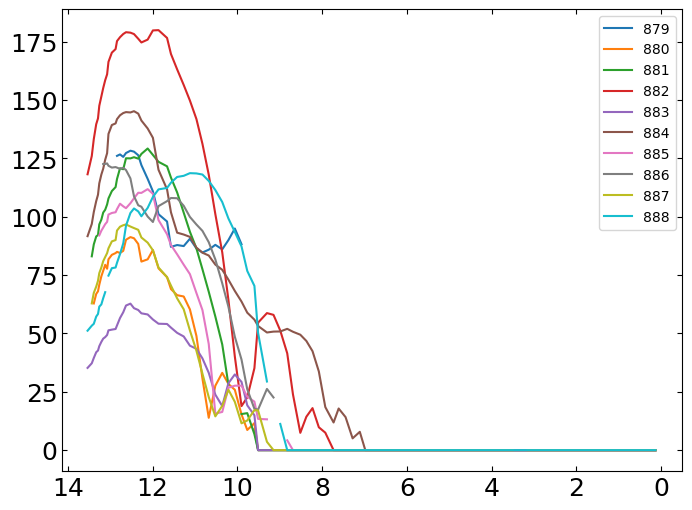

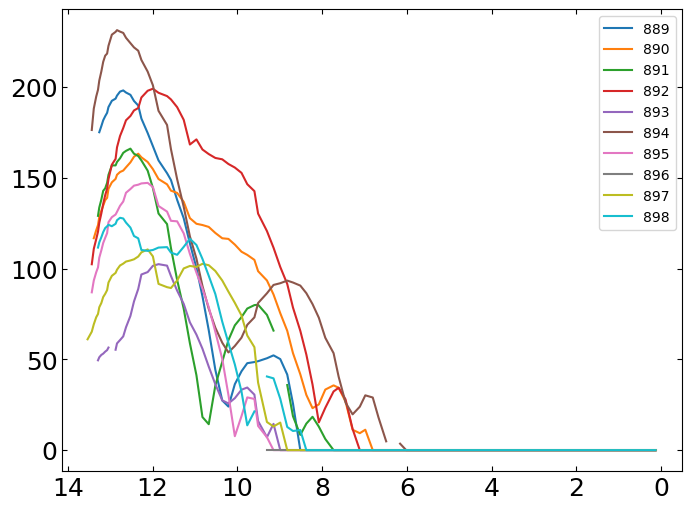

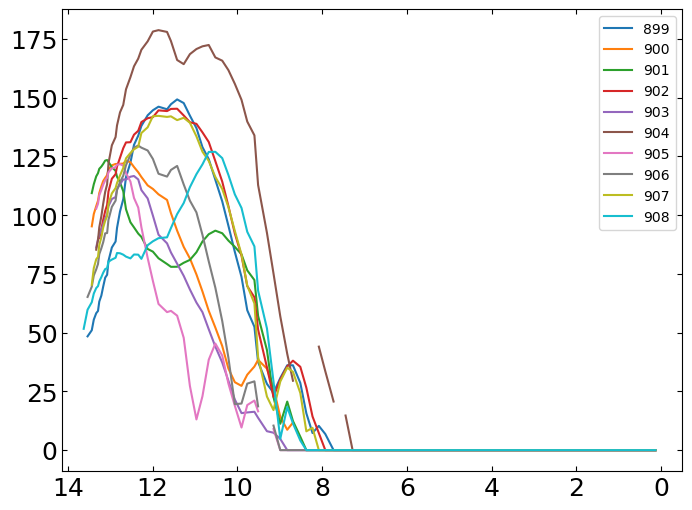

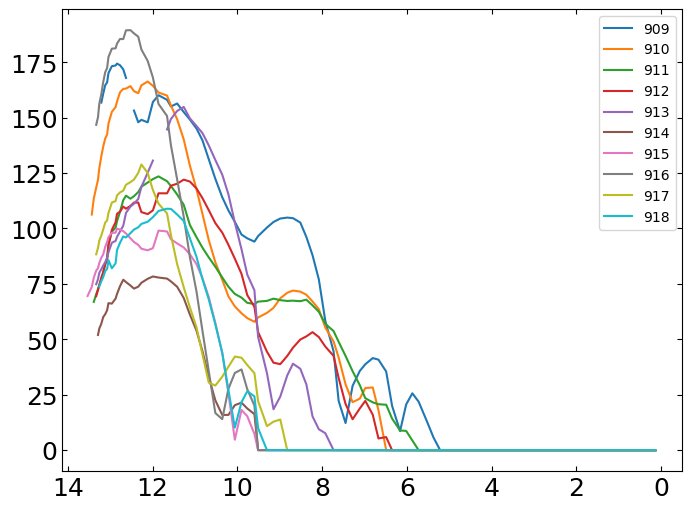

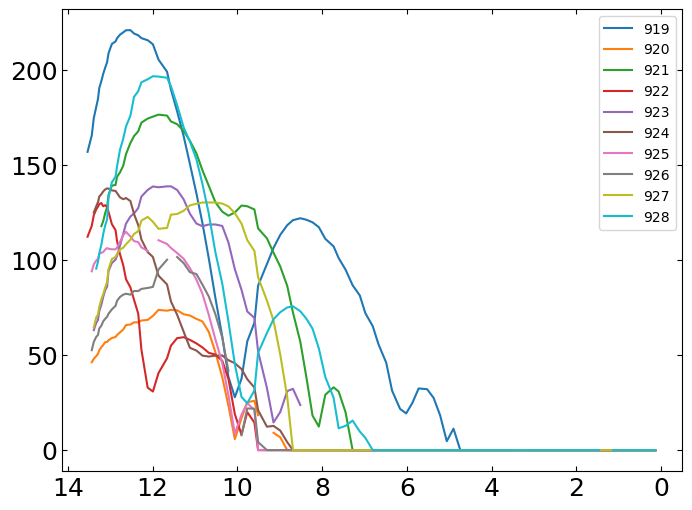

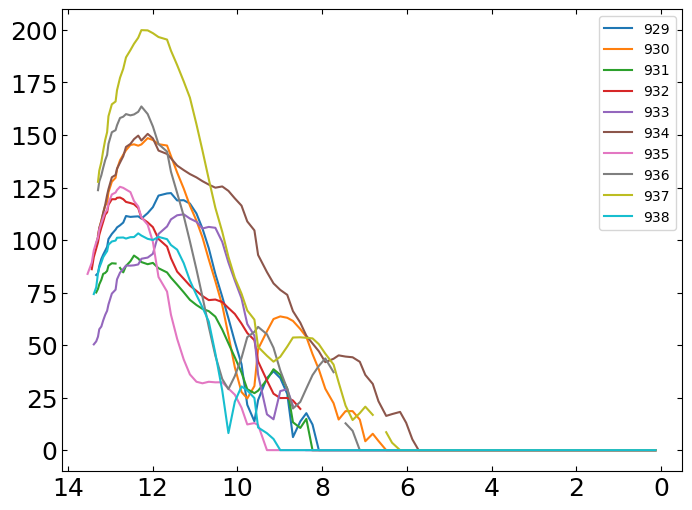

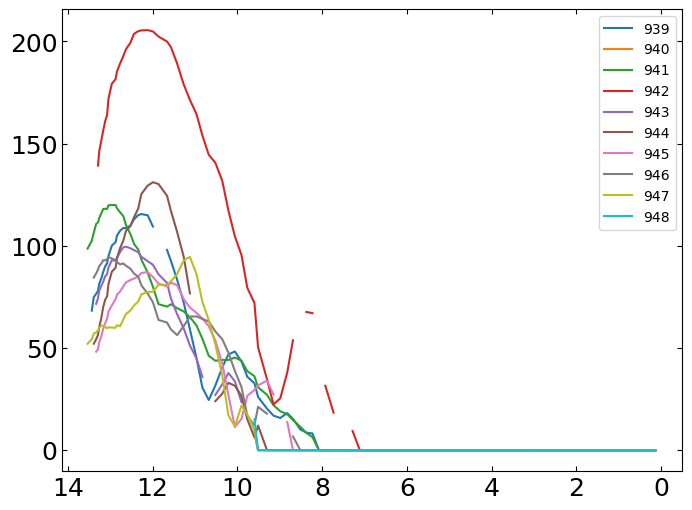

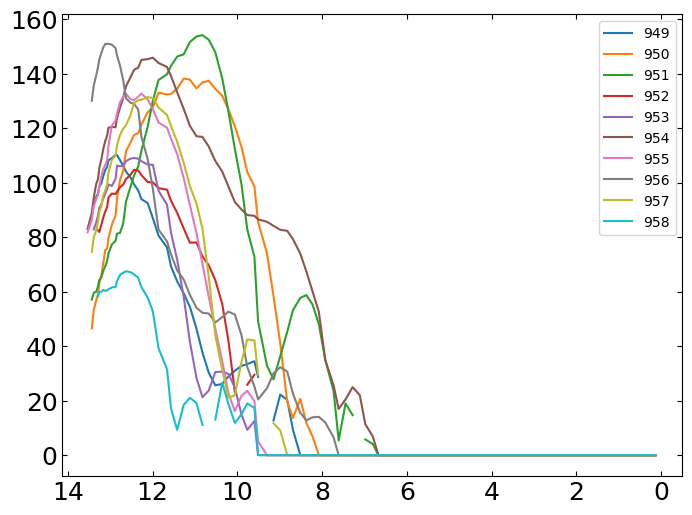

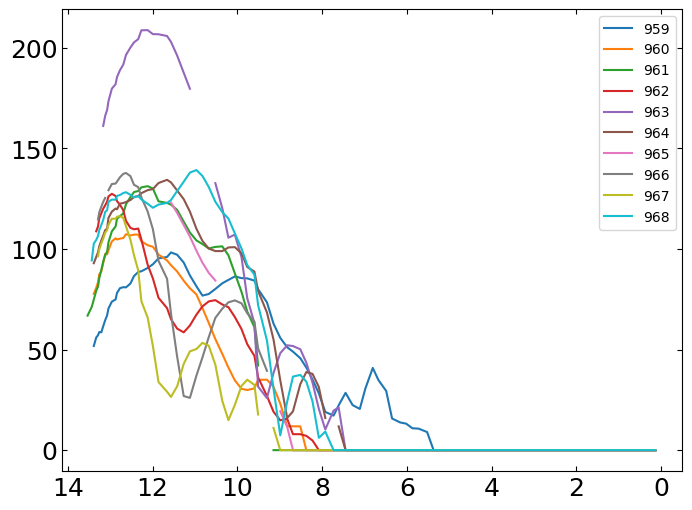

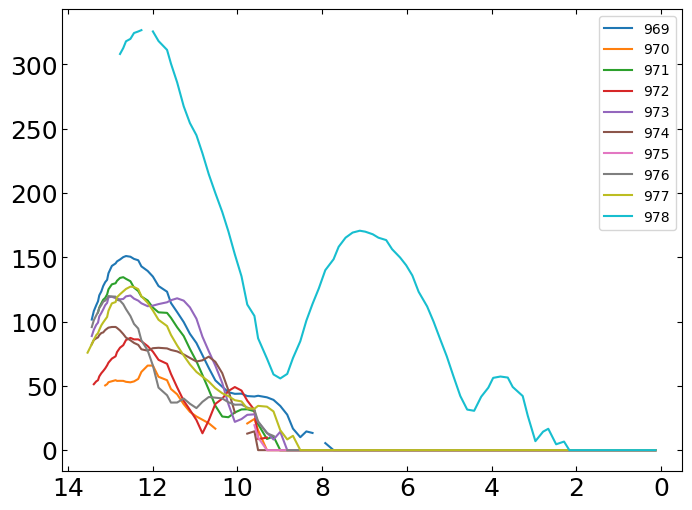

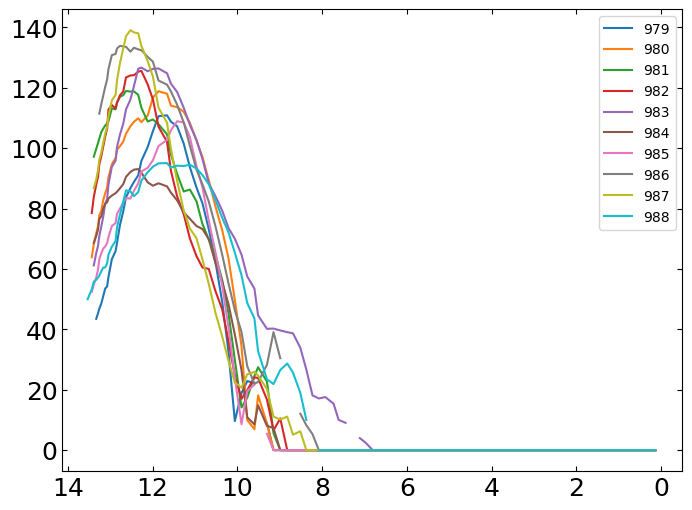

In [53]:
plotnum = 0
for i in range(nummergers)[879:989]:
    if plotnum%10 == 0:
        fig = plt.figure(figsize=(8,6))
    plotnum += 1
    plt.plot(snap['Lookback Time'][::-1][1:],orbit['Separations'][orbit['MergerFlag']==1][i],label=i)    
    plt.legend(fontsize=10)    
    plt.xlim(np.max(snap['Lookback Time']+0.5),-0.5)
plt.show()

from mergers: 
916 - early merger (z=~9.5)
29, 39, 45 - small median merger (z=6)
32, 55 - longer merger (z=4)
131, 242, 585, 978 - (z=2)
611  - late merger (z=0)

from non-mergers:


## Merging orbits

In [8]:
# indices of table with [orbit['MergerFlag']==1] (thus, not universal indices)
merge_subind = [941,45,55,131,611]

# the subfind ids that correspond to the mergers I want to plot
merge_IDs = np.array(orbit['SubfindID1'][orbit['MergerFlag']==1][merge_subind],dtype='int32')

# corresponding indices of full table
merge_ind = [np.where(orbit['SubfindID1']==i)[0][0] for i in merge_IDs]
print(merge_ind)

# create colors to correspond to mergers
cmap = plt.get_cmap('gist_heat')
colorval = np.linspace(0.2,0.8,len(merge_subind))

[1067, 55, 67, 154, 704]


### Merging orbits via subind

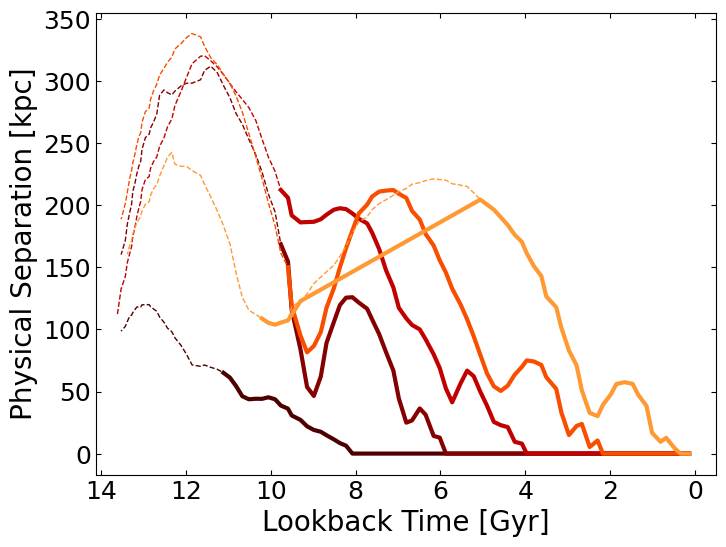

In [156]:
fig = plt.figure(figsize=(8,6))

for en, ind in enumerate(merge_subind):
    groupmask = orbit['GroupFlag'][orbit['MergerFlag']==1][ind]
    nonnanmask = ~np.isnan(orbit['Separations'][orbit['MergerFlag']==1][ind])
        
    snap_group = snap['Lookback Time'][::-1][1:][groupmask]
    orbit_group = orbit['Separations'][orbit['MergerFlag']==1][ind][groupmask]
    

    snap_nonnan = snap['Lookback Time'][::-1][1:][nonnanmask]
    orbit_nonnan = orbit['Separations'][orbit['MergerFlag']==1][ind][nonnanmask]
    
    plt.plot(snap_nonnan, orbit_nonnan, color=cmap(colorval[en]), linestyle='dashed', lw=1)    
    plt.plot(snap_group, orbit_group, label=ind, color=cmap(colorval[en]), lw=3)    

plt.ylabel("Physical Separation [kpc]")
plt.xlabel("Lookback Time [Gyr]")
             
plt.xlim(np.max(snap['Lookback Time']+0.5),-0.5)

plt.show()

### same plot but using the global ind

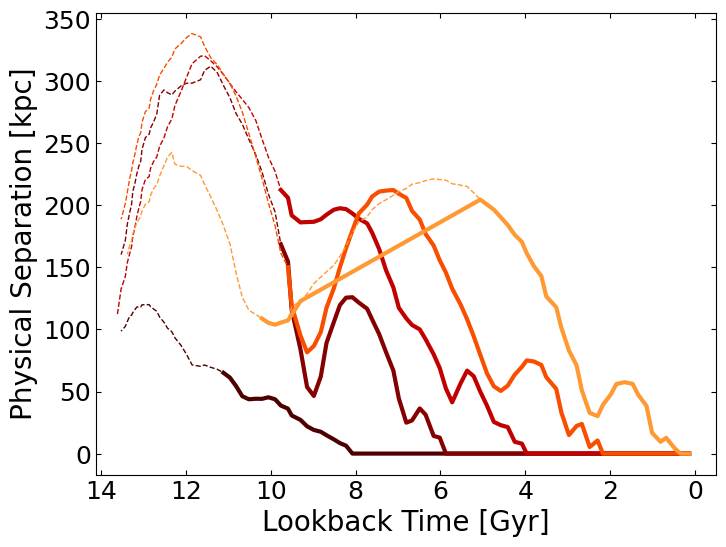

In [158]:
fig = plt.figure(figsize=(8,6))

for en, ind in enumerate(merge_ind):
    groupmask = orbit['GroupFlag'][ind]
    nonnanmask = ~np.isnan(orbit['Separations'][ind])
        
    snap_group = snap['Lookback Time'][::-1][1:][groupmask]
    orbit_group = orbit['Separations'][ind][groupmask]
    

    snap_nonnan = snap['Lookback Time'][::-1][1:][nonnanmask]
    orbit_nonnan = orbit['Separations'][ind][nonnanmask]
    
    plt.plot(snap_nonnan, orbit_nonnan, color=cmap(colorval[en]), linestyle='dashed', lw=1)    
    plt.plot(snap_group, orbit_group, label=ind, color=cmap(colorval[en]), lw=3)    

plt.ylabel("Physical Separation [kpc]")
plt.xlabel("Lookback Time [Gyr]")
             
plt.xlim(np.max(snap['Lookback Time']+0.5),-0.5)

plt.show()

### Make Group line not-skip
take separations where group = false and set to np.nan? 

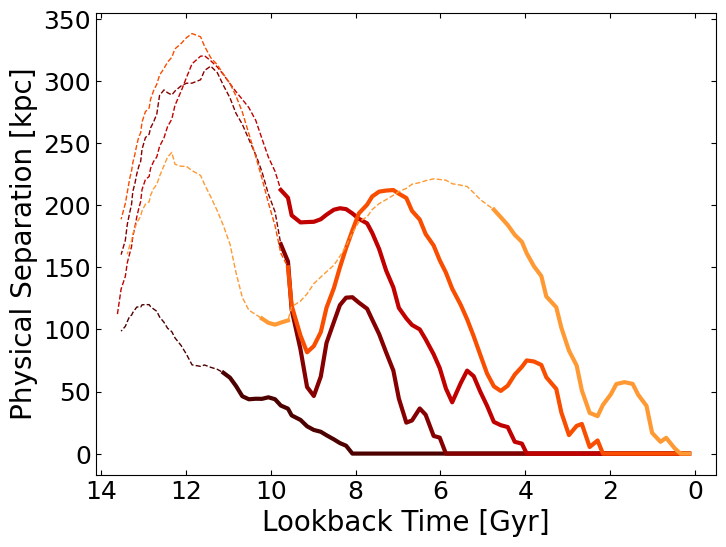

In [165]:
fig = plt.figure(figsize=(8,6))

for en, ind in enumerate(merge_ind):
    # - nonnan - #
    nonnanmask = ~np.isnan(orbit['Separations'][ind])
    snaps = snap['Lookback Time'][::-1][1:][nonnanmask]
    seps = orbit['Separations'][ind][nonnanmask]
    
    plt.plot(snaps, seps, color=cmap(colorval[en]), linestyle='dashed', lw=1)    
    
    
    # - group true - #
    snaps = snap['Lookback Time'][::-1][1:]
    seps = np.where(orbit['GroupFlag'][ind], orbit['Separations'][ind],np.nan)

    plt.plot(snaps, seps, label=ind, color=cmap(colorval[en]), lw=3)    

plt.ylabel("Physical Separation [kpc]")
plt.xlabel("Lookback Time [Gyr]")
             
plt.xlim(np.max(snap['Lookback Time']+0.5),-0.5)

plt.show()

## Nonmerging orbits

In [233]:
# indices of table with [orbit['MergerFlag']==0] (thus, not universal indices)
nomerge_subind = [112, 111, 104, 94, 74, 58, 31,130,120,126,92]
# nomerge_subind = [112, 104, 94, 74, 31,126]

# the subfind ids that correspond to the nonmergers I want to plot
nomerge_IDs = np.array(orbit['SubfindID1'][orbit['MergerFlag']==0][nomerge_subind],dtype='int32')

# corresponding indices of full table
nomerge_ind = [np.where(orbit['SubfindID1']==i)[0][0] for i in nomerge_IDs]

# create colors to correspond to nonmergers
colorval = np.linspace(0.2,0.8,len(nomerge_ind))

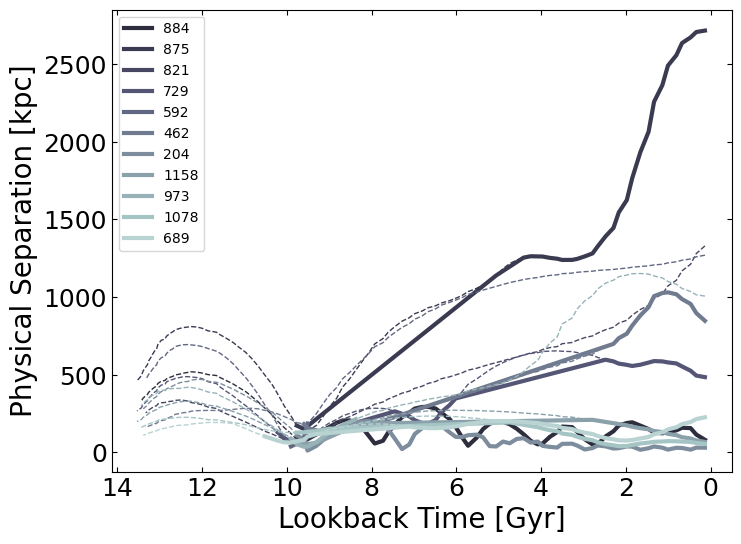

In [234]:
fig = plt.figure(figsize=(8,6))

for en, ind in enumerate(nomerge_ind):
    groupmask = orbit['GroupFlag'][ind]
    nonnanmask = ~np.isnan(orbit['Separations'][ind])
        
    snap_group = snap['Lookback Time'][::-1][1:][groupmask]
    orbit_group = orbit['Separations'][ind][groupmask]
    

    snap_nonnan = snap['Lookback Time'][::-1][1:][nonnanmask]
    orbit_nonnan = orbit['Separations'][ind][nonnanmask]
    
    plt.plot(snap_nonnan, orbit_nonnan, color=cmap(colorval[en]), linestyle='dashed', lw=1)    
    plt.plot(snap_group, orbit_group, label=ind, color=cmap(colorval[en]), lw=3)    

plt.ylabel("Physical Separation [kpc]")
plt.xlabel("Lookback Time [Gyr]")
plt.legend(fontsize=10)
plt.xlim(np.max(snap['Lookback Time']+0.5),-0.5)

plt.show()

### continuous groups

In [220]:
# indices of table with [orbit['MergerFlag']==0] (thus, not universal indices)
nomerge_subind = [112, 111, 104, 94, 74, 58, 31,130,120,126,92]
nomerge_subind = [ 94, 74, 31,120,126]

# the subfind ids that correspond to the nonmergers I want to plot
nomerge_IDs = np.array(orbit['SubfindID1'][orbit['MergerFlag']==0][nomerge_subind],dtype='int32')

# corresponding indices of full table
nomerge_ind = [np.where(orbit['SubfindID1']==i)[0][0] for i in nomerge_IDs]

# create colors to correspond to nonmergers
cmap = plt.get_cmap('bone')
colorval = np.linspace(0.2,0.8,len(nomerge_ind))

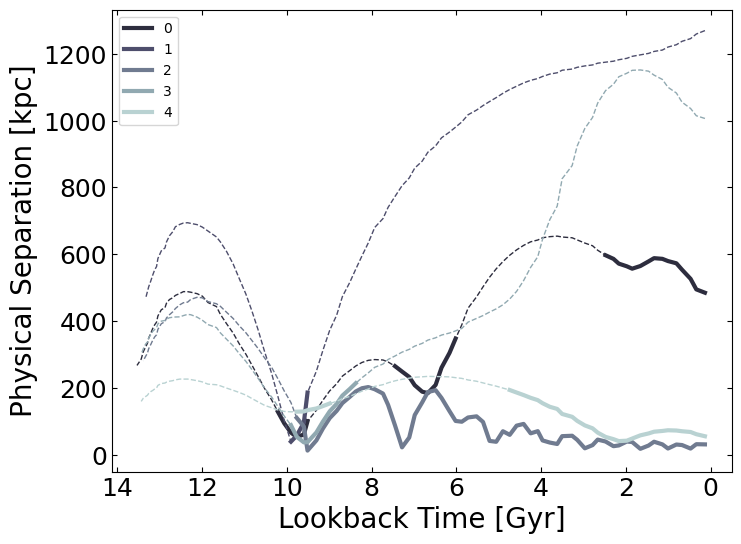

In [221]:
fig = plt.figure(figsize=(8,6))

for en, ind in enumerate(nomerge_ind):
    # - nonnan - #
    nonnanmask = ~np.isnan(orbit['Separations'][ind])
    snaps = snap['Lookback Time'][::-1][1:][nonnanmask]
    seps = orbit['Separations'][ind][nonnanmask]
    
    plt.plot(snaps, seps, color=cmap(colorval[en]), linestyle='dashed', lw=1)    
    
    
    # - group true - #
    snaps = snap['Lookback Time'][::-1][1:]
    seps = np.where(orbit['GroupFlag'][ind], orbit['Separations'][ind],np.nan)

    plt.plot(snaps, seps, label=en, color=cmap(colorval[en]), lw=3)    

plt.ylabel("Physical Separation [kpc]")
plt.xlabel("Lookback Time [Gyr]")

plt.legend(fontsize=10)
plt.xlim(np.max(snap['Lookback Time']+0.5),-0.5)

plt.show()

### likely vs. unbound

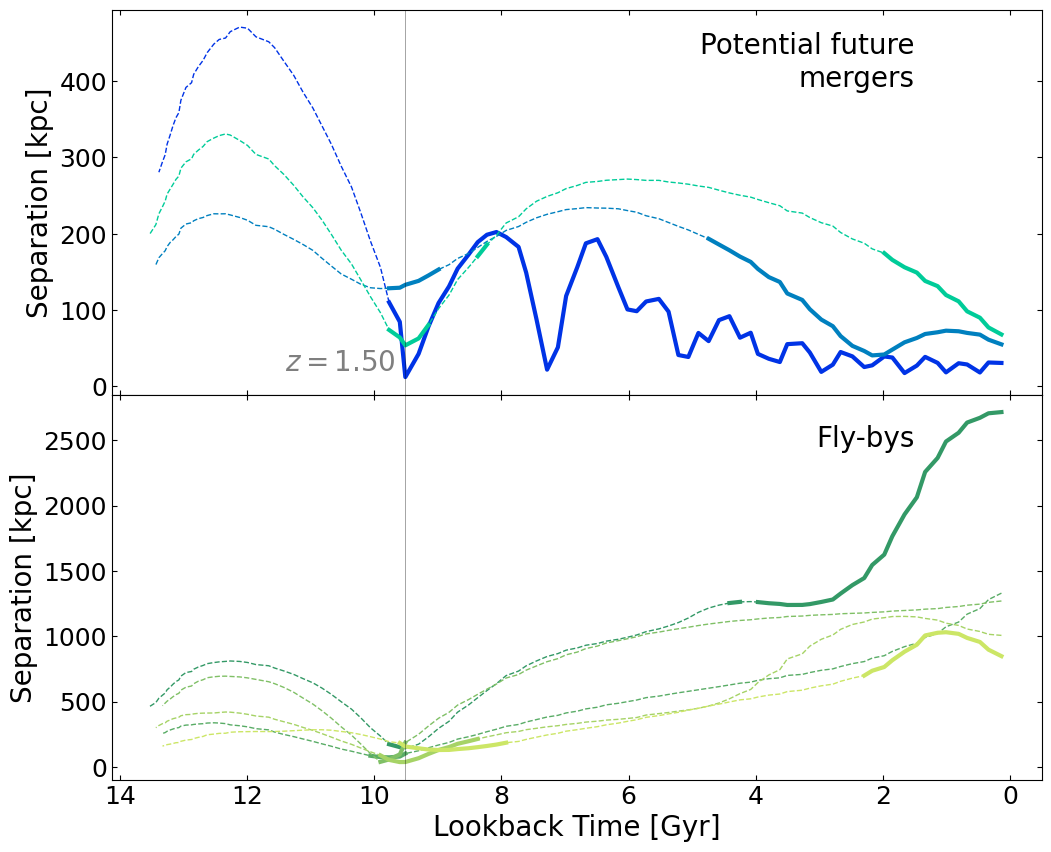

In [333]:
fig, ax = plt.subplots(2,1, figsize=(12,10), sharex=True, 
                       gridspec_kw={'width_ratios': [1], 
                                    'height_ratios':[1,1],
                                    'wspace': 0.10,
                                    "hspace":0.0})

likely_subind = [ 31,126,130] # 92, 112
unbound_subind = [ 111,104 , 74,120, 58] # 94
cmap_name = ["winter","summer"]

for plotnum, subinds in enumerate([likely_subind,unbound_subind]):
    
    # the subfind ids that correspond to the nonmergers I want to plot
    ids = np.array(orbit['SubfindID1'][orbit['MergerFlag']==0][subinds],dtype='int32')

    # corresponding indices of full table
    inds = [np.where(orbit['SubfindID1']==idd)[0][0] for idd in ids]

#     # create colors to correspond to nonmergers
#     cmap = plt.get_cmap('bone')
    colorval = np.linspace(0.2,0.8,len(inds))
    cmap = plt.get_cmap(cmap_name[plotnum])

    for en, ind in enumerate(inds):
        # - nonnan - #
        nonnanmask = ~np.isnan(orbit['Separations'][ind])
        snaps = snap['Lookback Time'][::-1][1:][nonnanmask]
        seps = orbit['Separations'][ind][nonnanmask]

        ax[plotnum].plot(snaps, seps, color=cmap(colorval[en]), linestyle='dashed', lw=1)            
#         ax[plotnum].plot(snaps, seps, color=cmap(colorval[en]), lw=2,label=subinds[en])    


        # - group true - #
        snaps = snap['Lookback Time'][::-1][1:]
        seps = np.where(orbit['GroupFlag'][ind], orbit['Separations'][ind],np.nan)

        ax[plotnum].plot(snaps, seps, color=cmap(colorval[en]), lw=3,label=subinds[en])    

# # plt.ylabel("Physical Separation [kpc]")
# # plt.xlabel("Lookback Time [Gyr]")
for i in range(2):
#     ax[i].legend(fontsize=10)
    ax[i].axvline(snap['Lookback Time'][snap['Snapshot']==40],color='black',lw=0.5,alpha=0.5)
    ax[i].set_ylabel("Separation [kpc]")
ax[0].text(snap['Lookback Time'][snap['Snapshot']==40]+0.15, 20,f"$z={snap['Redshift'][snap['Snapshot']==40][0]:.2f}$",alpha=0.5,ha='right')
# ax[1].text(snap['Lookback Time'][snap['Snapshot']==40]-0.25, 1300,"$T_{LB}$"+f"$={snap['Lookback Time'][snap['Snapshot']==40][0]:.2f}$ Gyr",alpha=0.5)
ax[0].text(1.5,425,"Potential future\nmergers",ha='right',va='center')
ax[1].text(1.5,2450,"Fly-bys",ha='right')

    
plt.xlim(np.max(snap['Lookback Time']+0.5),-0.5)
plt.xlabel("Lookback Time [Gyr]")
plt.show()

## Altogether now - Comparison

In [336]:
mergers = [941,45,55,131,611]
print(np.array(orbit['SubfindID1'][orbit['MergerFlag']==1][mergers],dtype='int32'))

likely_subind = [ 31,126,130] # 92, 112
print(np.array(orbit['SubfindID1'][orbit['MergerFlag']==0][likely_subind],dtype='int32'))

unbound_subind = [ 111,104 , 74,120, 58] # 94
print(np.array(orbit['SubfindID1'][orbit['MergerFlag']==0][unbound_subind],dtype='int32'))

[446120 277085 282026 309714 397340]
[320584 447958 464542]
[419008 412090 383035 431867 360801]


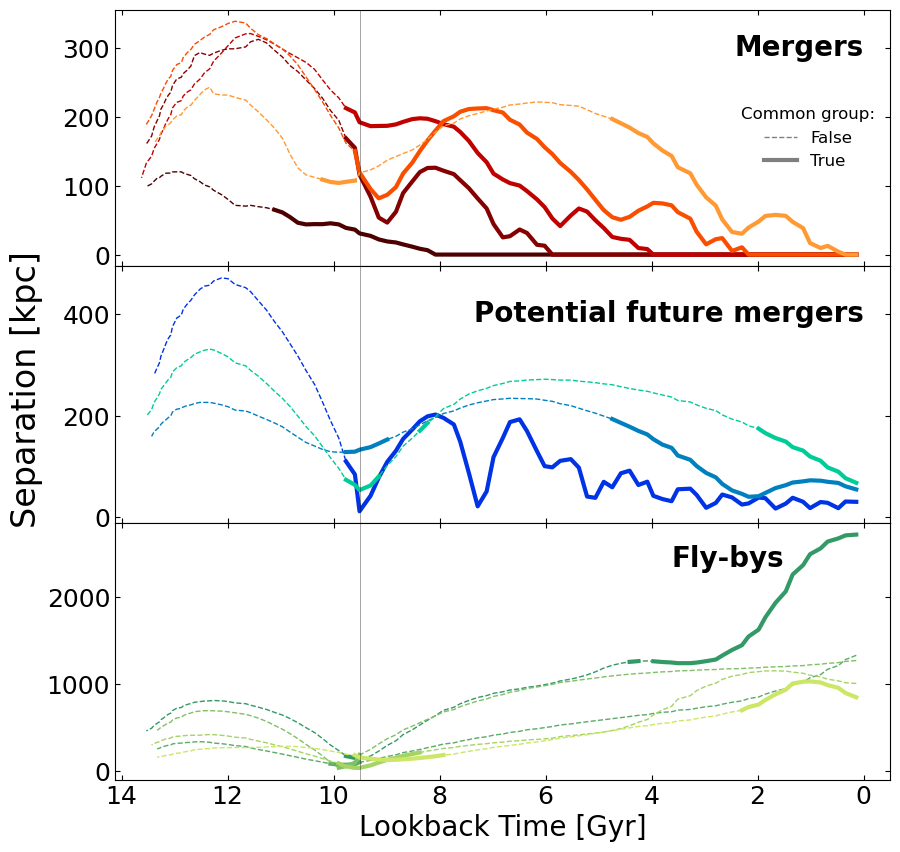

In [414]:
fig, ax = plt.subplots(3,1, figsize=(10,10), sharex=True, 
                       gridspec_kw={'width_ratios': [1], 
                                    'height_ratios':[1,1,1],
                                    'wspace': 0.10,
                                    "hspace":0.0})

# note: switched these to be subfind ids instead of indices
mergers = [446120, 277085, 282026, 309714, 397340]
likely_subind = [320584, 447958, 464542] # 92, 112
unbound_subind = [419008, 412090, 383035, 431867, 360801] # 94
cmap_name = ["gist_heat","winter","summer"]

for plotnum, subfindids in enumerate([mergers,likely_subind,unbound_subind]):

    # corresponding indices of full table
    inds = [np.where(orbit['SubfindID1']==idd)[0][0] for idd in subfindids]

    # initialize colormaps 
    colorval = np.linspace(0.2,0.8,len(inds))
    cmap = plt.get_cmap(cmap_name[plotnum])

    for en, ind in enumerate(inds):
        # - nonnan - #
        nonnanmask = ~np.isnan(orbit['Separations'][ind])
        snaps = snap['Lookback Time'][::-1][1:][nonnanmask]
        seps = orbit['Separations'][ind][nonnanmask]

        ax[plotnum].plot(snaps, seps, color=cmap(colorval[en]), linestyle='dashed', lw=1)            
#         ax[plotnum].plot(snaps, seps, color=cmap(colorval[en]), lw=2,label=subinds[en])    


        # - group true - #
        snaps = snap['Lookback Time'][::-1][1:]
        seps = np.where(orbit['GroupFlag'][ind], orbit['Separations'][ind],np.nan)

        ax[plotnum].plot(snaps, seps, color=cmap(colorval[en]), lw=3)#,label=subinds[en])    

# # plt.ylabel("Physical Separation [kpc]")
# # plt.xlabel("Lookback Time [Gyr]")
for i in range(3):
#     ax[i].legend(fontsize=10)
    ax[i].axvline(snap['Lookback Time'][snap['Snapshot']==40],color='black',lw=0.5,alpha=0.5)
fig.supylabel("Separation [kpc]")
# ax[1].text(snap['Lookback Time'][snap['Snapshot']==40]+0.15, 20,f"$z={snap['Redshift'][snap['Snapshot']==40][0]:.2f}$",alpha=0.5,ha='right')
# a[1].text(snap['Lookback Time'][snap['Snapshot']==40]-0.25, 1300,"$T_{LB}$"+f"$={snap['Lookback Time'][snap['Snapshot']==40][0]:.2f}$ Gyr",alpha=0.5)
xval = 0
# xval = (np.max(snap['Lookback Time']+0.5)+0.5)/2
ax[0].text(xval,300,"Mergers",ha='right',va='center',fontweight='semibold')
ax[1].text(xval,400,"Potential future mergers",ha='right',va='center',fontweight='semibold')
ax[2].text(xval+1.5,2350,"Fly-bys",ha='right',fontweight='semibold')
# ax[0].text(xval,300,"Mergers",ha='center',va='center')
# ax[1].text(xval,400,"Potential future mergers",ha='center',va='center')
# ax[2].text(xval,2350,"Fly-bys",ha='center')

ax[0].plot([0],[0],linestyle='dashed', lw=1,color='black',alpha=0.5,label='False')
ax[0].plot([0],[0],lw=3,color='black',alpha=0.5,label='True')
ax[0].legend(loc='center right',title="Common group:",fontsize=12,title_fontsize=12,frameon=False)
plt.xlim(np.max(snap['Lookback Time']+0.5),-0.5)
plt.xlabel("Lookback Time [Gyr]")
plt.savefig("../plots/2_pull-orbits/exorbits_physical.pdf")
plt.show()

## Comparison in Comoving? 

In [396]:
little_h = 0.6774
scales = snap['Scale'][::-1][:-1] # gives scale in same order as orbit data
scale_matrix = np.tile(scales,(len(orbit["Separations"]),1))
sep_matrix_ckpc = orbit["Separations"]/scale_matrix*little_h  


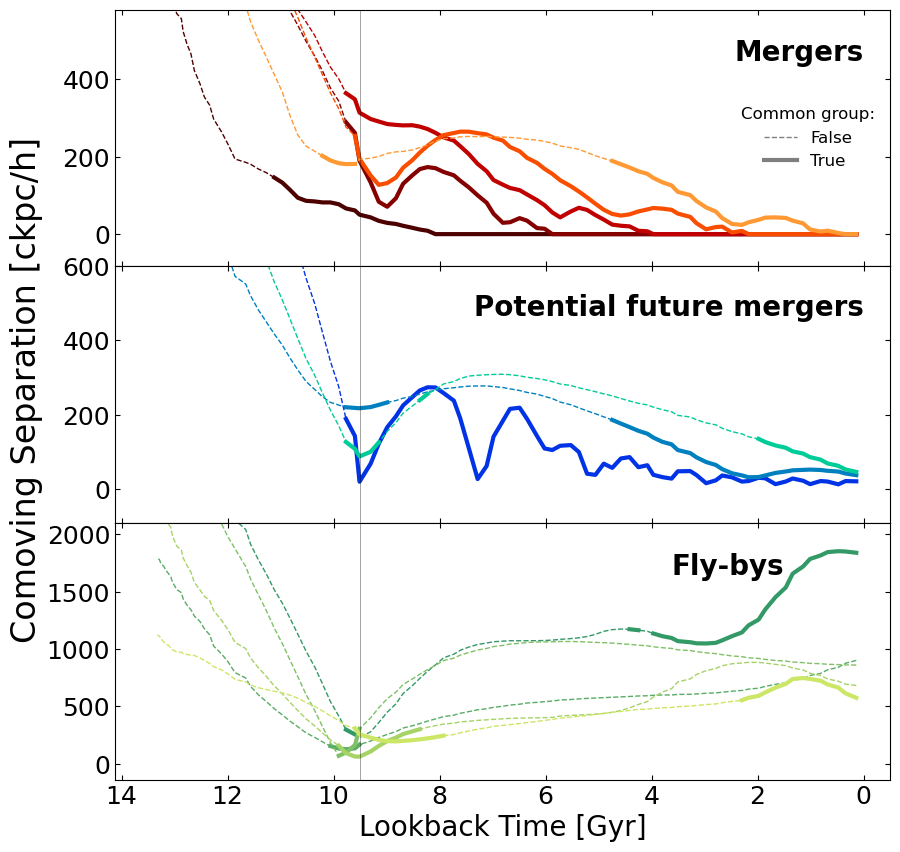

In [413]:
fig, ax = plt.subplots(3,1, figsize=(10,10), sharex=True, 
                       gridspec_kw={'width_ratios': [1], 
                                    'height_ratios':[1,1,1],
                                    'wspace': 0.10,
                                    "hspace":0.0})

# note: switched these to be subfind ids instead of indices
mergers = [446120, 277085, 282026, 309714, 397340]
likely_subind = [320584, 447958, 464542] # 92, 112
unbound_subind = [419008, 412090, 383035, 431867, 360801] # 94
cmap_name = ["gist_heat","winter","summer"]

for plotnum, subfindids in enumerate([mergers,likely_subind,unbound_subind]):

    # corresponding indices of full table
    inds = [np.where(orbit['SubfindID1']==idd)[0][0] for idd in subfindids]

    # initialize colormaps 
    colorval = np.linspace(0.2,0.8,len(inds))
    cmap = plt.get_cmap(cmap_name[plotnum])

    for en, ind in enumerate(inds):
        # - nonnan - #
        nonnanmask = ~np.isnan(sep_matrix_ckpc[ind])
        snaps = snap['Lookback Time'][::-1][1:][nonnanmask]
        seps = sep_matrix_ckpc[ind][nonnanmask]

        ax[plotnum].plot(snaps, seps, color=cmap(colorval[en]), linestyle='dashed', lw=1)            
#         ax[plotnum].plot(snaps, seps, color=cmap(colorval[en]), lw=2,label=subinds[en])    


        # - group true - #
        snaps = snap['Lookback Time'][::-1][1:]
        seps = np.where(orbit['GroupFlag'][ind], sep_matrix_ckpc[ind],np.nan)

        ax[plotnum].plot(snaps, seps, color=cmap(colorval[en]), lw=3)#,label=subinds[en])    

# # plt.ylabel("Physical Separation [kpc]")
# # plt.xlabel("Lookback Time [Gyr]")
for i in range(3):
#     ax[i].legend(fontsize=10)
    ax[i].axvline(snap['Lookback Time'][snap['Snapshot']==40],color='black',lw=0.5,alpha=0.5)
fig.supylabel("Comoving Separation [ckpc/h]")
# ax[1].text(snap['Lookback Time'][snap['Snapshot']==40]+0.15, 20,f"$z={snap['Redshift'][snap['Snapshot']==40][0]:.2f}$",alpha=0.5,ha='right')
# a[1].text(snap['Lookback Time'][snap['Snapshot']==40]-0.25, 1300,"$T_{LB}$"+f"$={snap['Lookback Time'][snap['Snapshot']==40][0]:.2f}$ Gyr",alpha=0.5)


# add legend
ax[0].plot([0],[0],linestyle='dashed', lw=1,color='black',alpha=0.5,label='False')
ax[0].plot([0],[0],lw=3,color='black',alpha=0.5,label='True')
ax[0].legend(loc='center right',title="Common group:",fontsize=12,title_fontsize=12,frameon=False)

# add labels for panels
xval = 0
ax[0].text(xval,470,"Mergers",ha='right',va='center',fontweight='semibold')
ax[1].text(xval,490,"Potential future mergers",ha='right',va='center',fontweight='semibold')
ax[2].text(xval+1.5,1650,"Fly-bys",ha='right',fontweight='semibold')

ax[0].set_ylim(top=580)
ax[1].set_ylim(top=600)
ax[2].set_ylim(top=2100)
plt.xlim(np.max(snap['Lookback Time']+0.5),-0.5)
plt.xlabel("Lookback Time [Gyr]")
plt.savefig("../plots/2_pull-orbits/exorbits_comoving.pdf")
plt.show()